In [201]:
import pandas as pd
import numpy as np

# 10.1 Решающее дерево

Посмотрим, как обучать решающие деревья в python.

In [202]:
import warnings
warnings.filterwarnings("ignore")

In [203]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

Будем предсказывать стоимость домов в Калифорнии.

In [204]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

In [205]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Разобъем данные на тренировочную и тестовые части. Обучим дерево на трейне и оценим качество ($R^2$) на тесте.

In [206]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

In [207]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)

DecisionTreeRegressor()

In [208]:
from sklearn.metrics import r2_score

pred = model.predict(Xtest)

r2_score(ytest, pred)

0.5985438896938047

In [209]:
pred_train = model.predict(Xtrain)

r2_score(ytrain, pred_train)

1.0

Дерево сильно переобучилось!

Попробуем ограничить его по глубине.

2 0.45120526546918793 0.4308859489546041
4 0.5881529015244183 0.5667458138420974
6 0.6735290661749251 0.63493185070596
8 0.7551678130970392 0.6774232710627766
10 0.8322088758923646 0.6860355422765186
12 0.898085527028839 0.6676113333539988
14 0.9446411229582562 0.6393103152601807
16 0.9733722182057432 0.619166347839695
18 0.9891436686412168 0.6102412265001813
20 0.995943271035502 0.6037285085139517
22 0.9985399910070567 0.6073040680179348
24 0.9996017215698247 0.5932368914100665


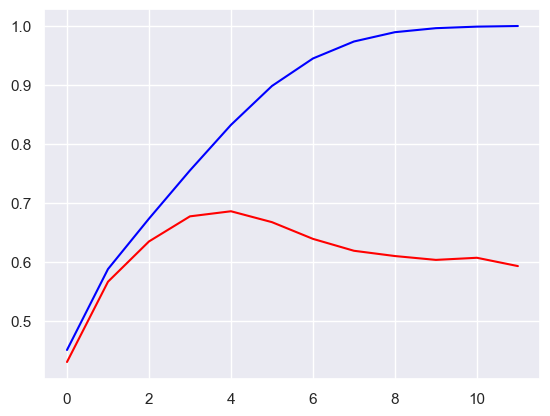

In [210]:
from matplotlib import pyplot as plt

train_scores = []
test_scores = []
depth_range = range(2, 26, 2)
for depth in depth_range:
    model = DecisionTreeRegressor(max_depth = depth)
    model.fit(Xtrain, ytrain)

    pred_train = model.predict(Xtrain)
    pred_test = model.predict(Xtest)

    train_r2 = r2_score(ytrain, pred_train)
    test_r2 = r2_score(ytest, pred_test)

    train_scores.append(train_r2)
    test_scores.append(test_r2)

    print(depth, train_r2, test_r2)

plt.plot(train_scores, color='blue')
plt.plot(test_scores, color='red')
plt.show();

Кросс-валидация

Судя по результатам эксперимента, оптимальная глубина дерева max_depth = 8. Но это мы узнали по конкретному разбиению на train-test.

Чтобы не привязываться к конкретному разбиению, можно посмотреть качество модели по кросс-валидации.

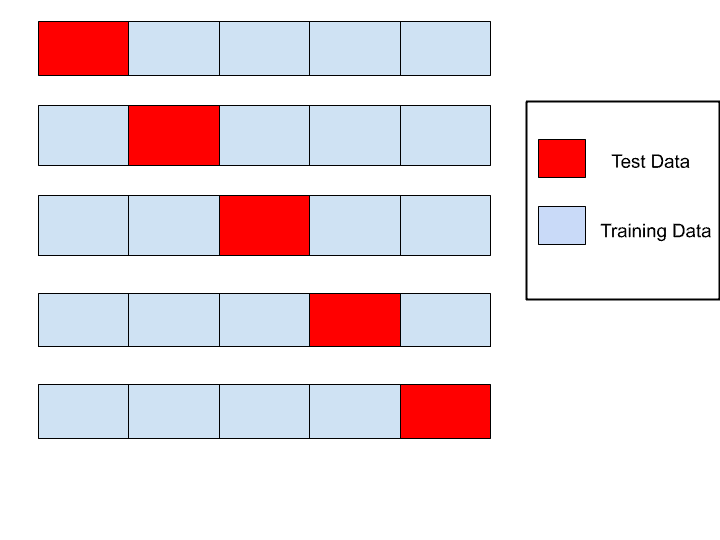

In [211]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeRegressor(max_depth = 8)

cross_val_score(model, X, y, cv=3, scoring='r2')

array([0.47598423, 0.60591077, 0.46838043])

In [212]:
cross_val_score(model, X, y, cv=3, scoring='r2').mean()

np.float64(0.5176638507610684)

Решающее дерево можно визуализировать.

Это очень удобно для интерпретации результатов.

In [213]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(Xtrain, ytrain)

DecisionTreeRegressor(max_depth=3)

In [214]:
import dtreeviz

viz_model = dtreeviz.model(model, Xtrain, ytrain,
                           feature_names=Xtrain.columns)

viz_model.view(fancy = False, scale = 2)

# 10.2 Обучение решающих деревьев

In [215]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier().__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None}

Мы уже решали задачу предсказания стоимости домов при помощи дерева. Тогда удалось добиться качества примерно
$R^2=0.5$ на кросс-валидации.

Немного. Попытаемся улучшить его путём подбора гиперпараметров.

In [216]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [217]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

In [218]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Подберем гиперпараметры дерева по кросс-валидации по сетке при помощи GridSearchCV.

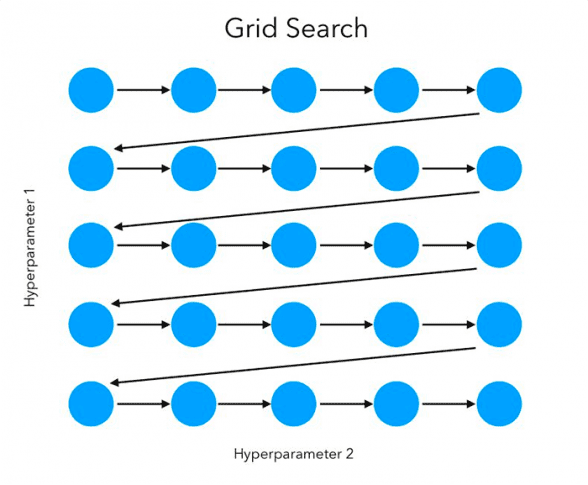

In [219]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

params = {'max_depth' : np.arange(2, 6),
          'min_samples_split' : np.arange(2, 9, 2),
          'min_samples_leaf': np.arange(1, 10, 2)}

gs = GridSearchCV(DecisionTreeRegressor(), params, cv=3, scoring='r2', verbose=2)

gs.fit(X, y)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END max_depth=2, min_samples_le

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([2, 3, 4, 5]),
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([2, 4, 6, 8])},
             scoring='r2', verbose=2)

In [220]:
gs.best_params_

{'max_depth': np.int64(5),
 'min_samples_leaf': np.int64(9),
 'min_samples_split': np.int64(2)}

In [221]:
gs.best_estimator_, gs.best_score_

(DecisionTreeRegressor(max_depth=np.int64(5), min_samples_leaf=np.int64(9),
                       min_samples_split=np.int64(2)),
 np.float64(0.5390892243233139))

Используем прунинг для уменьшения количества вершин в дереве и, следовательно, для снижения переобучения.

Прунинг при обучении дерева использует регуляризованный функционал
$$Q_{\alpha}(T) = Q(T) + \alpha |T|,$$
где $T$ - дерево, $Q(T)$ - функция потерь, $|T|$ - число вершин в дереве.

В sklearn есть Cost-Complexity pruning, который возвращает список возможных порогов $\alpha$ при построении дерева  
(т.к. данных конечное число, то не нужно рассматривать бесконечное число значений).

In [222]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

tree = DecisionTreeRegressor()

path = tree.cost_complexity_pruning_path(Xtrain, ytrain)
alphas = path['ccp_alphas']

alphas

array([0.00000000e+00, 4.30319002e-20, 5.02038835e-20, ...,
       7.95140486e-02, 1.01733053e-01, 4.20802794e-01])

In [223]:
len(alphas)

13917

Чем больше $\alpha$, тем сильнее регуляризация, и тем меньше дерево переобучается.

Посмотрим на зависимость качества предсказания дерева на тренировочных и тестовых данных в зависимости от $\alpha$.

TQDM

Некоторые операции в python выполняются долго.
* Иногда прямо внутри функции есть параметр `verbose`, настроив который, можно узнать сколько уже итераций сделано.
* Если мы хотим посмотреть, как долго будет выполняться цикл, нам поможет библиотека `tqdm`

In [224]:
from tqdm import tqdm

for i in tqdm(range(10000000)):
    pass

100%|██████████| 10000000/10000000 [00:01<00:00, 5144065.71it/s]


In [225]:
import seaborn as sns
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

# cv_score = []

# for i in tqdm(alphas[::100]):
#     tree = DecisionTreeRegressor(ccp_alpha = i)

#     cv = cross_val_score(tree, X, y, cv=3, scoring='r2').mean()
#     cv_score.append(cv)

# 100%|██████████| 140/140 [02:36<00:00,  1.12s/it]

In [226]:
cv_score = [np.float64(0.32083092593953394),
 np.float64(0.33641952134688774),
 np.float64(0.3169098474989602),
 np.float64(0.31776092914882303),
 np.float64(0.3198172682961104),
 np.float64(0.31822865780645615),
 np.float64(0.3239139796851915),
 np.float64(0.3331248163434765),
 np.float64(0.3251282412854227),
 np.float64(0.32093785983368356),
 np.float64(0.3230981976312114),
 np.float64(0.3235057208422261),
 np.float64(0.32187357118939547),
 np.float64(0.3314893698215105),
 np.float64(0.3271633962721047),
 np.float64(0.3234321284764817),
 np.float64(0.3250231789581057),
 np.float64(0.32191290814776563),
 np.float64(0.3153233878025789),
 np.float64(0.3147351443670141),
 np.float64(0.3185787074191734),
 np.float64(0.31196457259462856),
 np.float64(0.32997857854207924),
 np.float64(0.32207385166796343),
 np.float64(0.3242834145862483),
 np.float64(0.3186239811335028),
 np.float64(0.330592858621993),
 np.float64(0.3220852340515448),
 np.float64(0.3248264348163205),
 np.float64(0.3214421879650519),
 np.float64(0.3235124869615678),
 np.float64(0.3152724814893619),
 np.float64(0.3224856702771402),
 np.float64(0.3284698022112416),
 np.float64(0.3199299639114347),
 np.float64(0.32935024793541895),
 np.float64(0.3119035069734155),
 np.float64(0.323669374077445),
 np.float64(0.3202161304268837),
 np.float64(0.32287897331714077),
 np.float64(0.32370761226848677),
 np.float64(0.33122884153280047),
 np.float64(0.31399876863194126),
 np.float64(0.32160303561889253),
 np.float64(0.3222529128286136),
 np.float64(0.30618713334111197),
 np.float64(0.32401243816969794),
 np.float64(0.33043720978453756),
 np.float64(0.3318264636910502),
 np.float64(0.3295452899095502),
 np.float64(0.31597545629488055),
 np.float64(0.31788171049338654),
 np.float64(0.3268920692741345),
 np.float64(0.33363474861778303),
 np.float64(0.327045555085157),
 np.float64(0.3239223286752782),
 np.float64(0.32367808490606625),
 np.float64(0.32326712901150795),
 np.float64(0.3268474971642094),
 np.float64(0.33005642498465093),
 np.float64(0.3157779191283389),
 np.float64(0.3231227022165212),
 np.float64(0.3277662323348522),
 np.float64(0.3253053957679318),
 np.float64(0.3216295452759759),
 np.float64(0.3168890932879175),
 np.float64(0.3234469982127311),
 np.float64(0.3212122105850582),
 np.float64(0.3208507837533687),
 np.float64(0.31759712857816397),
 np.float64(0.31359380342792514),
 np.float64(0.32792667216922816),
 np.float64(0.3250687639429236),
 np.float64(0.32636924906422526),
 np.float64(0.32573253710573175),
 np.float64(0.3255538089740872),
 np.float64(0.3335975176182107),
 np.float64(0.31929984122019184),
 np.float64(0.31657430952041704),
 np.float64(0.33681983120343556),
 np.float64(0.3392185961130547),
 np.float64(0.3266664492696321),
 np.float64(0.33019165882045415),
 np.float64(0.31665586600847223),
 np.float64(0.32969471660172583),
 np.float64(0.3258797689449762),
 np.float64(0.31580103938835774),
 np.float64(0.33958746353734787),
 np.float64(0.3290158968388355),
 np.float64(0.3268167699175165),
 np.float64(0.3243430651283731),
 np.float64(0.324613533040478),
 np.float64(0.3388415490024686),
 np.float64(0.33010207440589323),
 np.float64(0.32111133234438843),
 np.float64(0.33748776952420384),
 np.float64(0.33432343158978967),
 np.float64(0.3363178672052496),
 np.float64(0.3348806813540661),
 np.float64(0.32755540195272587),
 np.float64(0.3364492593293158),
 np.float64(0.3312323496485244),
 np.float64(0.32784183767040537),
 np.float64(0.3268640925522632),
 np.float64(0.32556504361472705),
 np.float64(0.3426673723634714),
 np.float64(0.32670021942702915),
 np.float64(0.3261128481029297),
 np.float64(0.33730811130510013),
 np.float64(0.33098442489790725),
 np.float64(0.3405742100038716),
 np.float64(0.3453361935866522),
 np.float64(0.34817580508436996),
 np.float64(0.33898723064244174),
 np.float64(0.34168719544089443),
 np.float64(0.34739266506574706),
 np.float64(0.34106490345056506),
 np.float64(0.3460948906620079),
 np.float64(0.3420251685518653),
 np.float64(0.3571163845402244),
 np.float64(0.33868916931209014),
 np.float64(0.3581988838969181),
 np.float64(0.34988624497473086),
 np.float64(0.3538046931208126),
 np.float64(0.35219993243147796),
 np.float64(0.3599708355849173),
 np.float64(0.3579582372916778),
 np.float64(0.36586093473930764),
 np.float64(0.36855733832825116),
 np.float64(0.37422519742220556),
 np.float64(0.3907534570812052),
 np.float64(0.3967771760095466),
 np.float64(0.40623828894209596),
 np.float64(0.4018850335418547),
 np.float64(0.41715832249466667),
 np.float64(0.4359037224208156),
 np.float64(0.4740135400992213),
 np.float64(0.48005235295971405),
 np.float64(0.5230714565608096),
 np.float64(0.5075950724019204)]

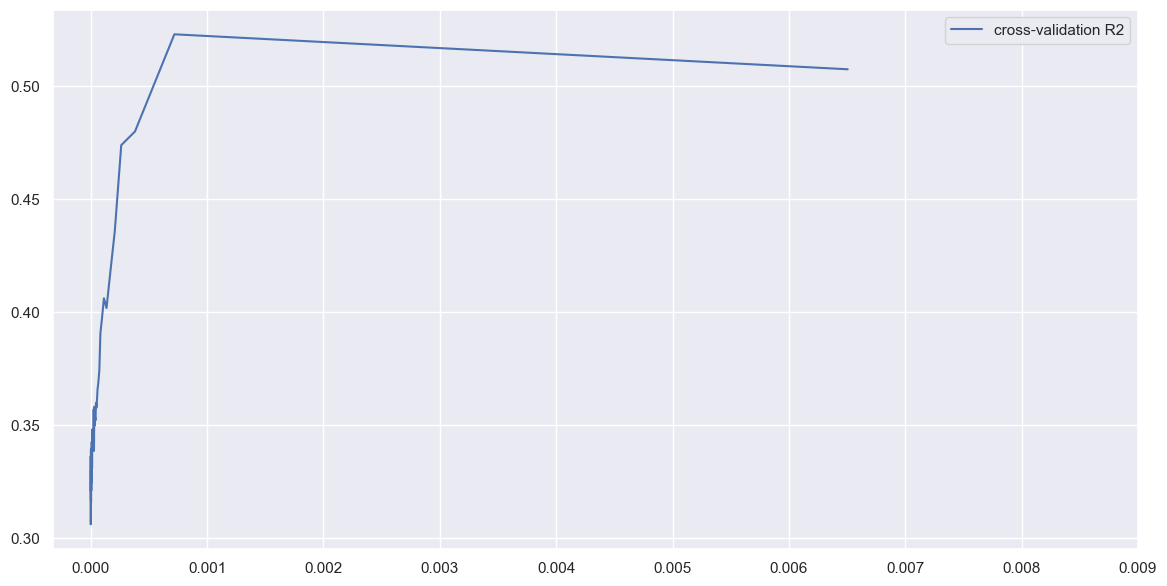

In [227]:
sns.set_theme()
plt.figure(figsize=(14, 7))
sns.lineplot(y = cv_score, x = alphas[::100], label = "cross-validation R2")
plt.xticks(ticks = np.arange(0.00, 0.01, 0.001))
plt.show();

Мы видим, что аккуратный подбор гиперпараметра $\alpha$ при прунинге позволяет улучшить качество модели.

Также можно комбинировать прунинг и подбор других гиперпараметров - это долгая кропотливая работа.

# 10.4  Домашнее задание - 8

В этом задании будем решать задачу классификации клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора (оттоковый клиент) в ближайшее время или нет.

В ноутбуке будем использовать несколько моделей, в том числе SVM, поэтому установим библиотеку для быстрого обучения SVM.

## Импорт библиотек и загрузка данных

In [315]:
# from sklearnex import patch_sklearn
# patch_sklearn()

In [316]:
import sys
import os
import site
import pandas as pd
import numpy as np

sys.path.append(os.path.join(os.path.dirname(site.getsitepackages()[0]), "site-packages"))

In [317]:
# зафиксируем константы
RANDOM_STATE = 42

In [318]:
df = pd.read_csv("data/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [319]:
df.shape

(3333, 20)

## Практика

In [320]:
np.random.seed(RANDOM_STATE)

Сделайте первичную обработку данных:

1) Выбросите колонку State

2) Колонки International plan и Voice mail plan закодируйте следующим образом: "Yes" замените на 1, а "No" на 0.

3) Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [321]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [322]:
df = df.drop('State', axis=1)
df.shape

(3333, 19)

In [323]:
# your code here

df[['International plan', 'Voice mail plan']] = df[['International plan', 'Voice mail plan']].replace({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype(int)

### Вопрос

Чему равна сумма значений в закодированном столбце International plan?

In [324]:
# your code here
df['International plan'].sum()

np.int64(323)

Выведите на экран первые строки измененной таблицы, чтобы проверить, что все преобразования сработали.

In [325]:
# your code here
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [326]:
# your code here

X = df.drop('Churn', axis=1)
y = df['Churn']

### Вопрос

Проверьте баланс классов. Является ли выборка сбалансированной?

In [327]:
# your code here

y.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

По кросс-валидации с тремя фолдами и метрикой ROC-AUC (scoring='roc_auc') обучите:

1) Логистическую регрессию

2) Метод опорных векторов (с kernel='linear')

Выведите на экран среднее качество моделей на кросс-валидации.

При объявлении SVC не забудьте указать в гиперпараметрах probability = True (так как метод изначально не предсказывает вероятности классов, а они нам нужны для вычисления ROC-AUC).

In [328]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
# your code here
# roc_auc_logreg = cross_val_score(LogisticRegression(), X, y, scoring='roc_auc', cv=3)
# roc_auc_svc = cross_val_score(SVC(kernel='linear', probability=True), X, y, scoring='roc_auc', cv=3)

roc_auc_logreg = np.array([0.72953253, 0.71376267, 0.76034652])
roc_auc_svc = np.array([0.78755803, 0.81211507, 0.8152272 ])

In [329]:
print(roc_auc_logreg)
print(roc_auc_svc)

[0.72953253 0.71376267 0.76034652]
[0.78755803 0.81211507 0.8152272 ]


In [330]:
print(f'Метрика roc_auc для логистической регрессии: {roc_auc_logreg.mean()}')
print(f'Метрика roc_auc для метода опорных векторов: {roc_auc_svc.mean()}')

Метрика roc_auc для логистической регрессии: 0.73454724
Метрика roc_auc для метода опорных векторов: 0.8049667666666668


Теперь обучите решающее дерево с параметрами по умолчанию по кросс-валидации с тремя фолдами и той же метрикой.

ВАЖНО! У решающего дерева для воспроизводимости результатов фиксируйте random_state = RANDOM_STATE

In [331]:
from sklearn.tree import DecisionTreeClassifier

# your code here

roc_auc_tree = cross_val_score(DecisionTreeClassifier(), X, y, scoring='roc_auc', cv=3)
roc_auc_tree

array([0.81361556, 0.83961752, 0.83809088])

In [332]:
print(f'Метрика roc_auc для решающего дерева: {roc_auc_tree.mean()}')

Метрика roc_auc для решающего дерева: 0.830441320693037


### Вопрос

Какой из трех алгоритмов показал наилучшее качество на кросс-валидации?

Ваша цель - максимально улучшить модели. Для этого:

1) у линейных моделей подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом).

2) у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion - "gini" или "entropy".

Для подбора параметров используйте GridSearchCV с тремя фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

При подборе гиперпараметров по кросс-валидации для дальнейшей корректной оценки качества модели нужна отдельная выборка. Давайте сразу действовать правильно:

1) сначала разбиваем (как и раньше) данные на тренировочную и тестовую части
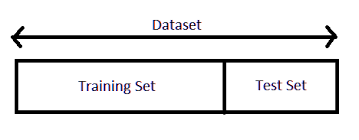

2) затем по тренировочной части при помощи GridSearchCV подбираем оптимальные значения гиперпараметров

3) наконец, делаем предсказание модели с оптимальными гиперпараметрами на тестовых данных и уже по ним оцениваем итоговую метрику.

Сложно, зато правильно!

Первую модель обучим для примера. Дальше вы сами.

In [333]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [334]:
from sklearn.model_selection import GridSearchCV

params = {'C' : np.linspace(0.1, 10.01, 20)}

gs = GridSearchCV(LogisticRegression(), params, cv=3, scoring='roc_auc')

gs.fit(Xtrain, ytrain)

gs.best_score_, gs.best_estimator_

(np.float64(0.7118881652544483),
 LogisticRegression(C=np.float64(1.6647368421052633)))

In [335]:
from sklearn.metrics import roc_auc_score

lr = gs.best_estimator_

pred_lr = lr.predict_proba(Xtest)[:,1]
print(roc_auc_score(ytest, pred_lr))

0.7796101215004366


In [336]:
svc = gs.best_estimator_
pred_svc = svc.predict_proba(Xtest)[:,1]
print('svc: ',roc_auc_score(ytest, pred_svc))

svc:  0.7796101215004366


In [ ]:
### DecisionTreeClassifier #########################################################
# у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion - "gini" или "entropy".

model_dtc = DecisionTreeClassifier(random_state=RANDOM_STATE)
params = {'max_depth' : np.arange(1, 10, 1),
         'criterion': ['gini', 'entropy']
         }

gs = GridSearchCV(model_dtc, params, cv=3, scoring='roc_auc')

gs.fit(Xtrain, ytrain)

# gs.best_score_, gs.best_estimator_

dtc = gs.best_estimator_
pred_dtc = dtc.predict_proba(Xtest)[:,1]
print('tdc: ',roc_auc_score(ytest, pred_dtc))

In [ ]:
# your code here

params = {'max_depth': np.arange(1, 10, 1), 'criterion': ['gini', 'entropy']}

gs = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_STATE), params, cv=3, scoring='roc_auc')

gs.fit(Xtrain, ytrain)

gs.best_score_, gs.best_estimator_

(np.float64(0.8644263148363854),
 DecisionTreeClassifier(max_depth=np.int64(6), random_state=42))

In [338]:
ypred = gs.predict(Xtest)
roc_auc_score(ytest, ypred)

np.float64(0.8315762417279338)

### Вопрос

Чему равно качество решающего дерева с подобранными гиперпараметрами, посчитанное на тестовой выборке?

Ответ округлите до сотых.

Какая модель справилась с решением задачи лучше всего по метрике roc_auc?

Нарисуйте roc-кривую для наилучшей модели.

In [339]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# your code here

Сравните между собой две лучшие модели.

### Вопрос

Насколько сильно отличается качество предсказания на тестовых данных?
(вычислите разность значений roc-auc)

In [340]:
# your code here

Постройте гистограммы важности признаков (для линейных моделей берите модуль значений весов) для каждой из этих моделей. Сравните между собой списки из трех самых важных признаков. Совпадают ли они?

### Вопрос

Какой признак наиболее важен для решающего дерева?

In [ ]:
# your code here

Сделайте выводы (для себя)

1) Являются ли данные сбалансированными? Что это означает?

2) Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?

3) Одинаковые ли признаки важны для работы двух наилучших моделей? Как вы думаете, почему так?